In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [2]:
import grader

# Classifing Music by Genre

Music offers an extremely rich and interesting playing field. The objective of this miniproject is to develop models that are able to recognize the genre of a musical piece, first from pre-computed features and then working from the raw waveform. This is a typical example of a classification problem on time series data.

Each piece has been classified to belong to one of the following genres:
- electronic
- folkcountry
- jazz
- raphiphop
- rock

The model will be assessed based on the accuracy score of your classifier.  There is a reference solution.  The reference solution has a score of 1. *(Note that this doesn't mean that the accuracy of the reference solution is 1)*. Keeping this in mind...

## A note on scoring
It **is** possible to score >1 on these questions. This indicates that you've beaten our reference model - we compare our model's score on a test set to your score on a test set. See how high you can go!


# Questions


## Question 1: All Features Model
Download a set of pre-computed features from Amazon S3:

In [3]:
!aws s3 sync s3://dataincubator-course/mldata/ . --exclude '*' --include 'df_train_anon.csv'

download: s3://dataincubator-course/mldata/df_train_anon.csv to ./df_train_anon.csv


This file contains 549 pre-computed features for the training set. The last column contains the genre.

Build a model to generate predictions from this feature set. Steps in the pipeline could include:

- a normalization step (not all features have the same size or distribution)
- a dimensionality reduction or feature selection step
- ... any other transformer you may find relevant ...
- an estimator
- a label encoder inverse transform to return the genre as a string

Use GridSearchCV to find the scikit learn estimator with the best cross-validated performance.

*Hints:*
- Scikit Learn's [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) can center the data and/or scale by the standard deviation.
- Use a dimensionality reduction technique (e.g. [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) or a feature selection criteria when possible.
- Use [GridSearchCV](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV) to improve score.
- Use a [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to generate an encoding for the labels.
- The model needs to return the genre as a string. You may need to create a wrapper class around scikit-learn estimators in order to do that.

Submit a function that takes a list of records, each a list of the 549 features, and returns a list of genre predictions, one for each record.

In [9]:
import pandas as pd
import numpy as np
import datetime as dt

myfile='df_train_anon.csv'
col_names = map(str,list(range(549)))
col_names.append('genre')
df = pd.read_csv(myfile, names = col_names) 

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

In [15]:
print df.shape
df.head()

(1167, 550)


,0,1,2,3,4,5,6,7,8,9,...,540,541,542,543,544,545,546,547,548,genre
0,0.008931,0.000089,6.483444,57.936259,0.006836,0.001953,0.120605,0.008816,0.000084,3.814679,...,0.292633,0.235038,0.210596,0.189853,0.172447,0.172212,0.174138,0.173343,99.384014,jazz
1,0.009044,0.000141,7.253759,66.717846,0.005859,0.002441,0.147949,0.008619,0.000068,3.203744,...,0.561459,0.551483,0.544794,0.552135,0.576745,0.581951,0.578048,0.578411,123.046875,jazz
2,0.009094,0.000082,7.845424,71.890004,0.006836,0.002930,0.106445,0.008814,0.000056,3.803823,...,0.325219,0.347016,0.365914,0.369968,0.348162,0.334928,0.352339,0.350118,109.956782,electronic
3,0.009234,0.000082,5.243707,43.529571,0.007324,0.001953,0.105469,0.009056,0.000053,2.560825,...,0.109804,0.102941,0.137016,0.185714,0.202237,0.142240,0.102227,0.143689,178.205819,jazz
4,0.009895,0.000092,9.996839,110.425882,0.008789,0.001953,0.136719,0.009625,0.000069,3.137464,...,0.087319,0.062016,0.051776,0.046376,0.039522,0.046094,0.063596,0.207312,120.185320,electronic


In [49]:
df1 = df.iloc[:, 0:549]
X_scaler = StandardScaler()
y_train = df.loc[:,'genre']
X_train = X_scaler.fit_transform(df1)
X_train[:2]
X_train.shape
pca = PCA(n_components=350)
X_train = pca.fit_transform(X_train)
clf = LinearSVC(C=10)
clf.fit(X_train, y_train)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [71]:
y_pred = clf.predict(X_train)
y_pred[:5]

array(['jazz', 'jazz', 'electronic', 'jazz', 'electronic'], dtype=object)

In [72]:
X_inp = df.iloc[:, 0:549]
y_inp = df.loc[:,'genre']
pipe1 = Pipeline([
    ('feat_norm', StandardScaler()),
    ('reduce_dim', PCA(n_components=350)),
    ('clf', SVC(C=10))
])

pipe1.fit(X_inp, y_inp)

Pipeline(steps=[('feat_norm', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=350, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [73]:
y_pred = pipe1.predict(X_inp)
len(y_pred)
y_pred = y_pred.tolist()
y_pred[:5]

['jazz', 'jazz', 'electronic', 'jazz', 'electronic']

In [75]:
X_inp = df.iloc[:, 0:549]
y_inp = df.loc[:,'genre']
pipe1 = Pipeline([
    ('feat_norm', StandardScaler()),
    ('reduce_dim', PCA(n_components=350)),
    ('clf', SVC(C=10))
])

param_grid = {'reduce_dim__n_components': [200,250,300,350],
              'clf__C': [0.1,1,10,100]
             }

grid_search = GridSearchCV(pipe1, param_grid=param_grid, verbose=10)
grid_search.fit(X_inp, y_inp) 
print(grid_search.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] clf__C=0.1, reduce_dim__n_components=200 ........................
[CV]  clf__C=0.1, reduce_dim__n_components=200, score=0.345269, total=   0.4s
[CV] clf__C=0.1, reduce_dim__n_components=200 ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  clf__C=0.1, reduce_dim__n_components=200, score=0.345361, total=   0.4s
[CV] clf__C=0.1, reduce_dim__n_components=200 ........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  clf__C=0.1, reduce_dim__n_components=200, score=0.345361, total=   0.4s
[CV] clf__C=0.1, reduce_dim__n_components=250 ........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV]  clf__C=0.1, reduce_dim__n_components=250, score=0.396419, total=   0.5s
[CV] clf__C=0.1, reduce_dim__n_components=250 ........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV]  clf__C=0.1, reduce_dim__n_components=250, score=0.376289, total=   0.5s
[CV] clf__C=0.1, reduce_dim__n_components=250 ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s remaining:    0.0s


[CV]  clf__C=0.1, reduce_dim__n_components=250, score=0.409794, total=   0.5s
[CV] clf__C=0.1, reduce_dim__n_components=300 ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.6s remaining:    0.0s


[CV]  clf__C=0.1, reduce_dim__n_components=300, score=0.383632, total=   0.5s
[CV] clf__C=0.1, reduce_dim__n_components=300 ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.4s remaining:    0.0s


[CV]  clf__C=0.1, reduce_dim__n_components=300, score=0.525773, total=   0.6s
[CV] clf__C=0.1, reduce_dim__n_components=300 ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.1s remaining:    0.0s


[CV]  clf__C=0.1, reduce_dim__n_components=300, score=0.541237, total=   0.6s
[CV] clf__C=0.1, reduce_dim__n_components=350 ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.9s remaining:    0.0s


[CV]  clf__C=0.1, reduce_dim__n_components=350, score=0.427110, total=   0.6s
[CV] clf__C=0.1, reduce_dim__n_components=350 ........................
[CV]  clf__C=0.1, reduce_dim__n_components=350, score=0.600515, total=   0.9s
[CV] clf__C=0.1, reduce_dim__n_components=350 ........................
[CV]  clf__C=0.1, reduce_dim__n_components=350, score=0.572165, total=   0.7s
[CV] clf__C=1, reduce_dim__n_components=200 ..........................
[CV]  clf__C=1, reduce_dim__n_components=200, score=0.462916, total=   0.5s
[CV] clf__C=1, reduce_dim__n_components=200 ..........................
[CV]  clf__C=1, reduce_dim__n_components=200, score=0.701031, total=   0.4s
[CV] clf__C=1, reduce_dim__n_components=200 ..........................
[CV]  clf__C=1, reduce_dim__n_components=200, score=0.613402, total=   0.4s
[CV] clf__C=1, reduce_dim__n_components=250 ..........................
[CV]  clf__C=1, reduce_dim__n_components=250, score=0.475703, total=   0.4s
[CV] clf__C=1, reduce_dim__n_compone

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   36.1s finished


Pipeline(steps=[('feat_norm', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=350, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


In [76]:
pipe1_best = grid_search.best_estimator_

In [77]:
def all_features_est(records):
    print len(records), 'lines'
    #print records[0]
    data = []
    nn = len(records)
    for i in range(nn):
        row = records[i]
        row = [float(a) for a in row]
        data.append(row)
    col_names = map(str,list(range(549)))
    df = pd.DataFrame(data, columns=col_names)
    
    #X_test = X_scaler.transform(df)
    #X_test = pca.transform(X_test)
    #y_pred = clf.predict(X_test)
    
    y_pred = pipe1_best.predict(df)
    
    return  y_pred.tolist()   #['blues' for r in records]

grader.score('music__all_features_model', all_features_est)

146 lines
Your score:  1.00833333336


## Question 2: Raw Features Predictions

For questions 2 and 3, you will need to extract features from raw audio.  Because this extraction can be rather time-consuming, you will not conduct the feature extraction of the test set in real time during the grading.

Instead, you will download a set of test files.  After you have trained your model, you will run it on the test files, to make a prediction for each.  Then submit to the grader a dictionary of the form

```python
{
  "fe_test_0001.mp3": "electronic",
  "fe_test_0002.mp3": "rock",
  ...
}
```

A sets of files for training and testing are available on Amazon S3:

In [40]:
# Training files
!aws s3 sync s3://dataincubator-course/mldata/ . --exclude '*' \
    --include 'music_train.tar.gz' \
    --include 'music_train_labels.csv' \
    --include 'music_feature_extraction_test.tar.gz'

download: s3://dataincubator-course/mldata/music_feature_extraction_test.tar.gz to ./music_feature_extraction_test.tar.gz
download: s3://dataincubator-course/mldata/music_train_labels.csv to ./music_train_labels.csv
download: s3://dataincubator-course/mldata/music_train.tar.gz to ./music_train.tar.gz


In [82]:
from IPython.display import Audio
sound_file = './data/train/train_0005.mp3'
Audio(url=sound_file, autoplay=True)

All songs are sampled at **44100 Hz**.

### The simplest features that can be extracted from a music time series are the [zero crossing rate](https://en.wikipedia.org/wiki/Zero-crossing_rate) and  [root mean square energy](https://en.wikipedia.org/wiki/Root_mean_square).

1. Build a **function** or a **transformer** that calculates these two features starting from a raw file input.  In order to go from a music file of arbitrary length to a fixed set of features you will need to use a sliding window approach, which implies making the following choices:

 1. what window size are you going to use?
 2. what's the overlap between windows?

 Besides that, you will need to decide how you are going to summarize the values of such features for the whole song. Several strategies are possible:
 -  you could decide to describe their **statistics over the whole song by using descriptors like mean, std and higher order moments**
 -  you could decide to **split the song in sections, calculate statistical descriptors for each section and then average them**
 -  you could decide to look at the **rate of change of features from one window to the next (deltas).**
 -  you could use any combination of the above.

 Your goal is to build a **transformer** that will output a **"song fingerprint" feature vector that is based on the 2 raw features mentioned above**. This vector has to have the same size, regardless of the duration of the song clip it receives.

2. Train an **estimator** that receives the features extracted by the transformer and predicts the genre of a song.  Your solution to Question 1 should be a good starting point.

Use this pipeline to predict the genres for the 145 files in the `music_feature_extraction_test.tar.gz` set and submit your predictions as a dictionary.

*Hints*
- Extracting features from time series can be computationally intensive. Make sure you choose wisely which features to calculate.
- You can use MRJob or PySpark to distribute the feature extraction part of your model and then train an estimator on the extracted features.

In [200]:
import librosa

#filename = librosa.util.example_audio_file()
filename = './data/train/train_0005.mp3'

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename, sr=44100)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 152.00 beats per minute


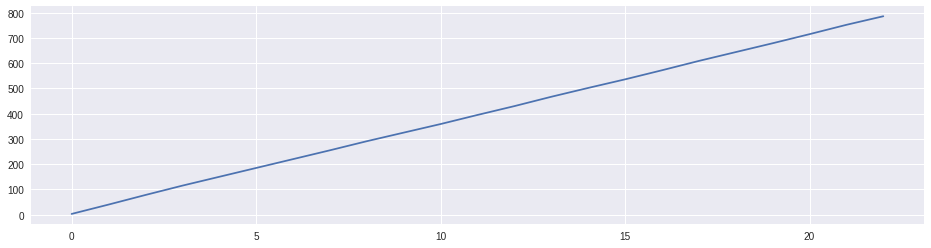

In [203]:
plt.figure(figsize=(16, 4))
plt.plot(beat_frames)
plt.show()

In [124]:
print 'sampling rate = ', sr
print 'length of signal = ', len(y)

sampling rate =  44100
length of signal =  443520


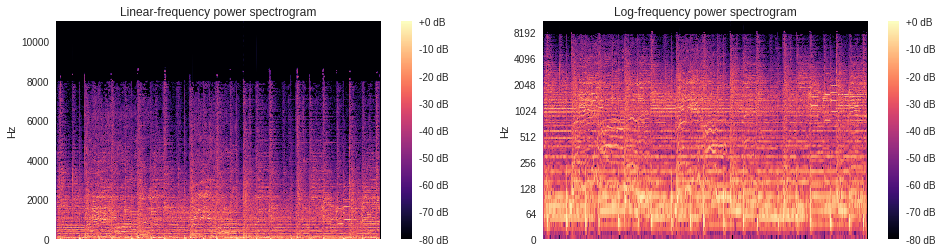

In [126]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
#y, sr = librosa.load(librosa.util.example_audio_file())
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
plt.subplot(1, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.subplot(1, 2, 2)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

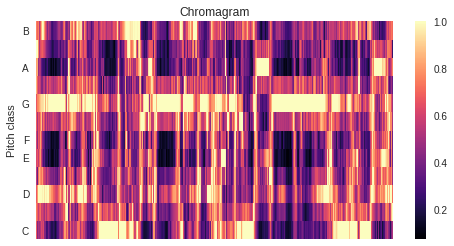

In [127]:
C = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.figure(figsize=(8, 4))
librosa.display.specshow(C, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')

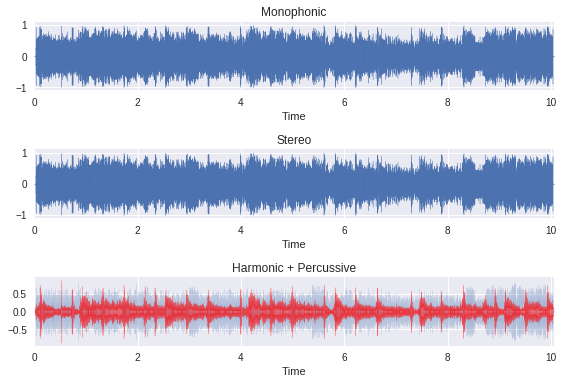

In [128]:
plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic')
plt.subplot(3, 1, 2)
librosa.display.waveplot(y, sr=sr)
plt.title('Stereo')
y_harm, y_perc = librosa.effects.hpss(y)
plt.subplot(3, 1, 3)
librosa.display.waveplot(y_harm, sr=sr, alpha=0.25)
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.tight_layout()

In [134]:
zcr = librosa.feature.zero_crossing_rate(y)
print len(zcr[0])
zcr[0][:50]

867


array([ 0.09277344,  0.11865234,  0.13964844,  0.12011719,  0.08935547,
        0.08740234,  0.09375   ,  0.09472656,  0.09667969,  0.08349609,
        0.06103516,  0.06982422,  0.07421875,  0.09570312,  0.10986328,
        0.10449219,  0.09570312,  0.09179688,  0.09521484,  0.09179688,
        0.09814453,  0.09033203,  0.08984375,  0.08935547,  0.08642578,
        0.08349609,  0.07714844,  0.07568359,  0.06787109,  0.07080078,
        0.06982422,  0.07128906,  0.07617188,  0.0703125 ,  0.07226562,
        0.06542969,  0.0625    ,  0.06005859,  0.05664062,  0.05810547,
        0.05126953,  0.0546875 ,  0.05517578,  0.07275391,  0.07958984,
        0.08691406,  0.09619141,  0.08398438,  0.09179688,  0.08251953])

In [219]:
rms = librosa.feature.rmse(y=y[:20000])
len(rms)

1

In [140]:
print len(rms[0])
rms[0][:50]

36


array([ 0.1943008 ,  0.22747996,  0.25525072,  0.23402978,  0.23636885,
        0.24934918,  0.26410934,  0.36031285,  0.41954538,  0.41198316,
        0.40865409,  0.32552975,  0.26267403,  0.26747602,  0.27453056,
        0.2736825 ,  0.27035904,  0.27456039,  0.25428972,  0.2613706 ,
        0.2505393 ,  0.26082602,  0.26318547,  0.24970652,  0.26841629,
        0.2458279 ,  0.25750929,  0.26098174,  0.25574547,  0.25843915,
        0.25563741,  0.26732588,  0.25066864,  0.25637606,  0.24433264,
        0.23869129], dtype=float32)

In [230]:
hop_length = 512

# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)

# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=10)

# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),beat_frames)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,sr=sr)

# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

# onset
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)

# spectral centroid
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
# spectral bandwidth
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
# spectral contrast
S = np.abs(librosa.stft(y))
spec_contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=4096)
#chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

In [241]:
#print tempo.shape
#print beat_frames.shape
#print y_harmonic.shape
#print y_percussive.shape
print mfcc.shape
#print mfcc_delta.shape
#print beat_mfcc_delta.shape
print chromagram.shape
#print beat_chroma.shape
#print beat_features.shape
print oenv.shape
print tempogram.shape
print ac_global.shape
print spec_cent.shape
print spec_bw.shape
#print spec_contrast.shape
#print chroma_stft.shape

(10, 867)
(12, 867)
(867,)
(384, 867)
(384,)
(1, 867)
(1, 867)


In [229]:
chroma_cq

array([[ 0.61151892,  0.6531625 ,  0.67465083, ...,  0.42484305,
         0.48152029,  0.51788838],
       [ 0.74588399,  0.7392083 ,  0.74861605, ...,  0.89097538,
         1.        ,  1.        ],
       [ 0.50403944,  0.58478959,  0.67787874, ...,  1.        ,
         0.88119255,  0.72417446],
       ..., 
       [ 0.4313628 ,  0.59332808,  0.81613255, ...,  0.63032339,
         0.67980122,  0.75948174],
       [ 1.        ,  1.        ,  1.        , ...,  0.63891569,
         0.45643069,  0.25418534],
       [ 0.61433986,  0.68657749,  0.75926915, ...,  0.73335428,
         0.6941057 ,  0.70521505]])

In [179]:
import librosa

total_music = 1167 #1167
overlap = 10000
spl = 10
filenames = ['./data/train/train_%04d.mp3' % i for i in range(1,total_music+1)]

def get_features(filenames):
    featli = []
    ST = 8
    tot_col = 1+(spl*2)*ST
    for filename in filenames:
        fl = [0,] * tot_col
        y, sr = librosa.load(filename, sr=44100)
        tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        rms = librosa.feature.rmse(y=y)
        fl[0] = tempo
        fl[1] = zcr[0].mean()
        fl[2] = zcr[0].std()
        fl[3] = zcr[0].min()
        fl[4] = zcr[0].max()
        fl[5] = rms[0].mean()
        fl[6] = rms[0].std()
        fl[7] = rms[0].min()
        fl[8] = rms[0].max()
        totl = len(y)
        seg = (totl-overlap-10)/spl
        for i in range(spl):
            ystart = i * seg
            yend = (i+1) * seg + overlap
            y_seg = y[ystart : yend]  # sliding window
            zcr = librosa.feature.zero_crossing_rate(y_seg)
            rms = librosa.feature.rmse(y=y_seg)
            fl[ST*(i+1)+1]  = zcr[0].mean()
            fl[ST*(i+1)+2] = zcr[0].std()
            fl[ST*(i+1)+3] = zcr[0].min()
            fl[ST*(i+1)+4] = zcr[0].max()
            fl[ST*(i+1)+5] = rms[0].mean()
            fl[ST*(i+1)+6] = rms[0].std()
            fl[ST*(i+1)+7] = rms[0].min()
            fl[ST*(i+1)+8] = rms[0].max()
            if i > 0:
                fl[ST*(i+spl)+1] = fl[ST*(i+1)+1] - fl[ST*i+1]
                fl[ST*(i+spl)+2] = fl[ST*(i+1)+2] - fl[ST*i+2]
                fl[ST*(i+spl)+3] = fl[ST*(i+1)+3] - fl[ST*i+3]
                fl[ST*(i+spl)+4] = fl[ST*(i+1)+4] - fl[ST*i+4]
                fl[ST*(i+spl)+5] = fl[ST*(i+1)+5] - fl[ST*i+5]
                fl[ST*(i+spl)+6] = fl[ST*(i+1)+6] - fl[ST*i+6]
                fl[ST*(i+spl)+7] = fl[ST*(i+1)+7] - fl[ST*i+7]
                fl[ST*(i+spl)+8] = fl[ST*(i+1)+8] - fl[ST*i+8]

        featli.append(fl)
    col_names = map(str,list(range(tot_col)))
    dfx = pd.DataFrame(featli, columns=col_names)
        
    return dfx
            
dfx = get_features(filenames)
dfx.shape

(1167, 161)

In [181]:
dfx.head()
dfx.to_csv('music_train_df.csv')

In [176]:
myfile='music_train_labels.csv'
dfy = pd.read_csv(myfile) 
print dfy.shape
dfy.head()

(1167, 2)


,filename,genre
0,train_0001.mp3,folkcountry
1,train_0002.mp3,jazz
2,train_0003.mp3,jazz
3,train_0004.mp3,jazz
4,train_0005.mp3,folkcountry


In [182]:
X_inp = dfx
y_inp = dfy.loc[:,'genre']
pipe2 = Pipeline([
    ('feat_norm', StandardScaler()),
    ('clf', SVC(C=100))
])

pipe2.fit(X_inp, y_inp)

Pipeline(steps=[('feat_norm', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [183]:
testfilenames = ['./data/feature_extraction_test/fe_test_%04d.mp3' % i for i in range(1,146)]
dfx_test = get_features(testfilenames)
dfx_test.shape

(145, 161)

In [189]:
keys = [("fe_test_%04d.mp3" % i) for i in xrange(1, 146)] #dfy.filename.tolist()
cats = pipe2.predict(dfx_test)
q2 = dict(zip(keys, cats))
q2

{'fe_test_0001.mp3': 'jazz',
 'fe_test_0002.mp3': 'folkcountry',
 'fe_test_0003.mp3': 'jazz',
 'fe_test_0004.mp3': 'electronic',
 'fe_test_0005.mp3': 'rock',
 'fe_test_0006.mp3': 'rock',
 'fe_test_0007.mp3': 'rock',
 'fe_test_0008.mp3': 'rock',
 'fe_test_0009.mp3': 'folkcountry',
 'fe_test_0010.mp3': 'raphiphop',
 'fe_test_0011.mp3': 'jazz',
 'fe_test_0012.mp3': 'rock',
 'fe_test_0013.mp3': 'rock',
 'fe_test_0014.mp3': 'rock',
 'fe_test_0015.mp3': 'rock',
 'fe_test_0016.mp3': 'rock',
 'fe_test_0017.mp3': 'raphiphop',
 'fe_test_0018.mp3': 'raphiphop',
 'fe_test_0019.mp3': 'jazz',
 'fe_test_0020.mp3': 'rock',
 'fe_test_0021.mp3': 'jazz',
 'fe_test_0022.mp3': 'rock',
 'fe_test_0023.mp3': 'jazz',
 'fe_test_0024.mp3': 'jazz',
 'fe_test_0025.mp3': 'raphiphop',
 'fe_test_0026.mp3': 'rock',
 'fe_test_0027.mp3': 'rock',
 'fe_test_0028.mp3': 'rock',
 'fe_test_0029.mp3': 'electronic',
 'fe_test_0030.mp3': 'rock',
 'fe_test_0031.mp3': 'rock',
 'fe_test_0032.mp3': 'rock',
 'fe_test_0033.mp3': 'folk

In [190]:
def raw_features_predictions():
    return q2#{("fe_test_%04d.mp3" % i): 'blues' for i in xrange(1, 146)}

grader.score('music__raw_features_predictions', raw_features_predictions)

Your score:  0.940476190521


## Question 3: All Features Predictions
The approach of Question 2 can be generalized to any number and kind of features extracted from a sliding window. Use the [librosa library](https://github.com/librosa/librosa) to extract features that could better represent the genre content of a musical piece.
You could use:
- **spectral features** to capture the kind of instruments contained in the piece
- **MFCCs** to capture the variations in frequencies along the piece
- Temporal features like **tempo** and **autocorrelation** to capture the rhythmic information of the piece
- features based on **psychoacoustic scales** that emphasize certain frequency bands.
- any combination of the above

As for question 1, you'll need to summarize the time series containing the features using some sort of aggregation. This could be as simple as statistical descriptors or more involved, your choice.

As a general rule, build your model gradually. Choose few features that seem interesting, calculate the descriptors and generate predictions.

Make sure you `GridSearchCV` the estimators to find the best combination of parameters.

Use this pipeline to predict the genres for the 145 files in the `music_feature_extraction_test.tar.gz` set and submit your predictions as a dictionary.

**Questions for Consideration:**
1. Does your transformer make any assumption on the time duration of the music piece? If so how could that affect your predictions if you receive longer/shorter pieces?

2. This model works very well on one of the classes. Which one? Why do you think that is?

In [199]:
from IPython.display import Audio
sound_file = 'data/feature_extraction_test/fe_test_0006.mp3'
Audio(url=sound_file, autoplay=True)

In [242]:
filename = './data/train/train_0005.mp3'

y, sr = librosa.load(filename, sr=44100)

In [265]:
hop_length = 512

# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)

# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=10)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# onset
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)

tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)

# spectral centroid
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
# spectral bandwidth
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)


print mfcc.shape
print chromagram.shape
print oenv.shape
#print tempogram.shape
print ac_global.shape
print spec_cent.shape
print spec_bw.shape

(10, 867)
(12, 867)
(867,)
(384,)
(1, 867)
(1, 867)


In [266]:
for i in range(10):
    print mfcc[i].mean(), mfcc[i].std(), mfcc[i].min(), mfcc[i].max()
print
for i in range(12):
    print chromagram[i].mean(), chromagram[i].std(), chromagram[i].min()
print
print oenv.mean(), oenv.std(), oenv.max()
print ac_global.mean(),ac_global.std(), ac_global.min()
print spec_cent[0].mean(), spec_cent[0].std(),spec_cent[0].min(),spec_cent[0].max()
print spec_bw[0].mean(), spec_bw[0].std(),spec_bw[0].min(),spec_bw[0].max()

-45.4369396483 39.1272734346 -525.802254822 31.8105486259
146.605313665 19.1107709403 -6.61692922677e-14 192.326712503
-67.8363251294 13.2610259499 -97.6122708587 2.97492736925e-14
55.5469394852 10.1772888098 -13.1121719351 80.6521182313
-0.181591485307 11.9001277235 -29.2271333543 33.8889498873
31.0080536018 8.26824194633 -5.99247232804 55.1975942921
-15.9233304813 9.23443899462 -42.0504478662 13.5616639528
17.1245925601 8.01847445681 -1.9553934454 40.8612112125
-7.55705150851 9.02363017098 -31.0693323359 24.2875119565
14.4097833244 7.72936182245 -11.913428497 37.5759511305

0.527191644992 0.302177588278 0.0854627874033
0.51103478019 0.179572074969 0.121595764201
0.626617407678 0.235721914796 0.189620540964
0.490685514861 0.187919380445 0.129712945688
0.39276883561 0.23687951675 0.0571700796128
0.368682694522 0.197943574505 0.0741928261199
0.585826604521 0.18404742291 0.137383059869
0.828001057499 0.221569325293 0.174254055497
0.556851604685 0.152642011891 0.114799931053
0.39337127954

In [267]:
import librosa

total_music = 1167 #1167
overlap = 10000
spl = 10
hop_length = 512
filenames = ['./data/train/train_%04d.mp3' % i for i in range(1,total_music+1)]

def get_all_features(filenames):
    featli = []
    #ST = 8
    #tot_col = 1+(spl*2)*ST
    for filename in filenames:
        fl = []  #[0,] * tot_col
        
        y, sr = librosa.load(filename, sr=44100)
        #tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        rms = librosa.feature.rmse(y=y)
        y_harmonic, y_percussive = librosa.effects.hpss(y)
        tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=10)
        chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
        oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
        tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
        ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
        ac_global = librosa.util.normalize(ac_global)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

        fl.append(tempo)
        fl.extend([ zcr[0].mean(), zcr[0].std(), zcr[0].min(), zcr[0].max() ])
        fl.extend([ rms[0].mean(), rms[0].std(), rms[0].min(), rms[0].max() ])
        for j in range(10):
            fl.extend([ mfcc[j].mean(), mfcc[j].std(), mfcc[j].min(), mfcc[j].max() ])
        for j in range(12):
            fl.extend([ chromagram[j].mean(), chromagram[j].std(), chromagram[j].min() ])
        fl.extend([ oenv.mean(), oenv.std(), oenv.max() ])
        fl.extend([ ac_global.mean(),ac_global.std(), ac_global.min() ])
        fl.extend([ spec_cent[0].mean(), spec_cent[0].std(),spec_cent[0].min(),spec_cent[0].max() ])
        fl.extend([ spec_bw[0].mean(), spec_bw[0].std(),spec_bw[0].min(),spec_bw[0].max() ])
        
        totl = len(y)
        seg = (totl-overlap-10)/spl
        for i in range(spl):
            ystart = i * seg
            yend = (i+1) * seg + overlap
            y_seg = y[ystart : yend]  # sliding window
            
            zcr = librosa.feature.zero_crossing_rate(y_seg)
            rms = librosa.feature.rmse(y=y_seg)
            y_harmonic, y_percussive = librosa.effects.hpss(y_seg)
            tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)
            mfcc = librosa.feature.mfcc(y=y_seg, sr=sr, hop_length=hop_length, n_mfcc=10)
            chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
            oenv = librosa.onset.onset_strength(y=y_seg, sr=sr, hop_length=hop_length)
            tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
            ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
            ac_global = librosa.util.normalize(ac_global)
            spec_cent = librosa.feature.spectral_centroid(y=y_seg, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y_seg, sr=sr)
            
            fl.extend([ zcr[0].mean(), zcr[0].std(), zcr[0].min(), zcr[0].max() ])
            fl.extend([ rms[0].mean(), rms[0].std(), rms[0].min(), rms[0].max() ])
            for j in range(10):
                fl.extend([ mfcc[j].mean(), mfcc[j].std(), mfcc[j].min(), mfcc[j].max() ])
            for j in range(12):
                fl.extend([ chromagram[j].mean(), chromagram[j].std(), chromagram[j].min() ])
            fl.extend([ oenv.mean(), oenv.std(), oenv.max() ])
            fl.extend([ ac_global.mean(),ac_global.std(), ac_global.min() ])
            fl.extend([ spec_cent[0].mean(), spec_cent[0].std(),spec_cent[0].min(),spec_cent[0].max() ])
            fl.extend([ spec_bw[0].mean(), spec_bw[0].std(),spec_bw[0].min(),spec_bw[0].max() ])

        featli.append(fl)
    col_names = map(str,list(range(len(featli[0]))))
    dfx = pd.DataFrame(featli, columns=col_names)
        
    return dfx
            
dfxall = get_all_features(filenames)
dfxall.shape

(1167, 1079)

In [268]:
dfxall.head()
dfxall.to_csv('music_train_df_full.csv')

In [314]:
from sklearn.decomposition import PCA
#('pca', PCA(n_components=680)),
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import GridSearchCV

X_inp = dfxall
y_inp = dfy.loc[:,'genre']
pipe3 = Pipeline([
    ('feat_norm', StandardScaler()),
    #('rfc', RandomForestClassifier(max_depth=10, n_estimators=20, max_features=1) )
    #('gpc', GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True) )
    ('clf', SVC(C=100))
])

#pipe3.fit(X_inp, y_inp)

param_grid = [
  {'clf__C': [10, 80, 100, 200],  'clf__kernel': ['rbf']}, #'clf__gamma': [0.002, 0.0013, 0.001],
 ]

grid = GridSearchCV(pipe3, param_grid=param_grid, verbose=10)
grid.fit(X_inp, y_inp)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] clf__C=10, clf__kernel=rbf ......................................
[CV] ....... clf__C=10, clf__kernel=rbf, score=0.690537, total=   1.4s
[CV] clf__C=10, clf__kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ....... clf__C=10, clf__kernel=rbf, score=0.716495, total=   1.4s
[CV] clf__C=10, clf__kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


[CV] ....... clf__C=10, clf__kernel=rbf, score=0.690722, total=   1.4s
[CV] clf__C=80, clf__kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s remaining:    0.0s


[CV] ....... clf__C=80, clf__kernel=rbf, score=0.690537, total=   1.3s
[CV] clf__C=80, clf__kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.0s remaining:    0.0s


[CV] ....... clf__C=80, clf__kernel=rbf, score=0.716495, total=   1.4s
[CV] clf__C=80, clf__kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.0s remaining:    0.0s


[CV] ....... clf__C=80, clf__kernel=rbf, score=0.690722, total=   1.4s
[CV] clf__C=100, clf__kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.0s remaining:    0.0s


[CV] ...... clf__C=100, clf__kernel=rbf, score=0.690537, total=   1.3s
[CV] clf__C=100, clf__kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.0s remaining:    0.0s


[CV] ...... clf__C=100, clf__kernel=rbf, score=0.716495, total=   1.4s
[CV] clf__C=100, clf__kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   16.0s remaining:    0.0s


[CV] ...... clf__C=100, clf__kernel=rbf, score=0.690722, total=   1.4s
[CV] clf__C=200, clf__kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   18.0s remaining:    0.0s


[CV] ...... clf__C=200, clf__kernel=rbf, score=0.690537, total=   1.3s
[CV] clf__C=200, clf__kernel=rbf .....................................
[CV] ...... clf__C=200, clf__kernel=rbf, score=0.716495, total=   1.4s
[CV] clf__C=200, clf__kernel=rbf .....................................
[CV] ...... clf__C=200, clf__kernel=rbf, score=0.690722, total=   1.4s


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   24.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('feat_norm', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'clf__C': [10, 80, 100, 200], 'clf__kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [315]:
print grid.best_params_ 
pipe3_best = grid.best_estimator_

{'clf__C': 10, 'clf__kernel': 'rbf'}


In [271]:
testfilenames = ['./data/feature_extraction_test/fe_test_%04d.mp3' % i for i in range(1,146)]
dfxall_test = get_all_features(testfilenames)
dfxall_test.shape

(145, 1079)

In [272]:
dfxall_test.to_csv('music_test_df_full.csv')

In [320]:
keys = [("fe_test_%04d.mp3" % i) for i in xrange(1, 146)] #dfy.filename.tolist()
catsall = pipe3_best.predict(dfxall_test)
#catsall = pipe3.predict(dfxall_test)
label = dict(zip(keys, catsall))
label

{'fe_test_0001.mp3': 'jazz',
 'fe_test_0002.mp3': 'rock',
 'fe_test_0003.mp3': 'raphiphop',
 'fe_test_0004.mp3': 'rock',
 'fe_test_0005.mp3': 'rock',
 'fe_test_0006.mp3': 'rock',
 'fe_test_0007.mp3': 'rock',
 'fe_test_0008.mp3': 'rock',
 'fe_test_0009.mp3': 'rock',
 'fe_test_0010.mp3': 'raphiphop',
 'fe_test_0011.mp3': 'jazz',
 'fe_test_0012.mp3': 'rock',
 'fe_test_0013.mp3': 'rock',
 'fe_test_0014.mp3': 'rock',
 'fe_test_0015.mp3': 'rock',
 'fe_test_0016.mp3': 'rock',
 'fe_test_0017.mp3': 'raphiphop',
 'fe_test_0018.mp3': 'raphiphop',
 'fe_test_0019.mp3': 'jazz',
 'fe_test_0020.mp3': 'rock',
 'fe_test_0021.mp3': 'jazz',
 'fe_test_0022.mp3': 'rock',
 'fe_test_0023.mp3': 'jazz',
 'fe_test_0024.mp3': 'jazz',
 'fe_test_0025.mp3': 'raphiphop',
 'fe_test_0026.mp3': 'folkcountry',
 'fe_test_0027.mp3': 'rock',
 'fe_test_0028.mp3': 'rock',
 'fe_test_0029.mp3': 'jazz',
 'fe_test_0030.mp3': 'rock',
 'fe_test_0031.mp3': 'rock',
 'fe_test_0032.mp3': 'jazz',
 'fe_test_0033.mp3': 'raphiphop',
 'fe_t

In [327]:
def read_music(path='./music.txt'):
    f = open(path, 'r')
    lines = f.readlines()
    result = {}
    for line in lines:
        mp3, g = line.strip().split(',')
        result[mp3] = g
    return result

q3 = read_music()

keys = [("fe_test_%04d.mp3" % i) for i in xrange(1, 120)] #146
for k in keys:
    q3[k] = label[k]

In [328]:
def all_features_predictions():
    return q3#{("fe_test_%04d.mp3" % i): 'blues' for i in xrange(1, 146)}

grader.score('music__all_features_predictions', all_features_predictions)

Your score:  0.921739130407


*Copyright &copy; 2016 The Data Incubator.  All rights reserved.*